<a href="https://colab.research.google.com/github/aanchaljain1993/codsoft_taskno1/blob/main/TASK1_TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROBLEM STATEMENT
* To develop a model that correctly predicts whether a passenger on the Titanic survived or not.
* To develop a user friendly interface for giving instant prediction for a random input.


## ADDRESSING THE PROBLEM
* I checked various classifier model to find the best accuracy score of the model and found all are performing equally fine.
* Here I intend to use Logistic Regression to prepare the model.
* I will use for loop to create the user friendly interface.

# GETTING STARTED!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTING THE LIBRARIES

In [ ]:
#IMPORTIG THE DEPENDENCIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**IMPORTING CSV FILE**

In [ ]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#IDENTIFYING ROWS AND COLUMNS
titanic_df.shape

(891, 12)

In [ ]:
#EXTRACTING INFORMATION OF THE DATA
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#IDENTIFYING THE MISSING VALUES
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#DROPTING COLUMN FROM DATAFRAME
titanic_df = titanic_df.drop(columns = 'Cabin', axis = 1)


In [ ]:
#REPLACEMENT OF MISSING IN 'AGE' COLUMN
titanic_df ['Age'].fillna(titanic_df['Age'].mean(), inplace = True)

In [ ]:
#Finding MODE value of 'Embark'
print(titanic_df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
# now replace 's' with all missing values because it is categorical
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace=True)

In [ ]:
# check null
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Analyzing on how many people have survived
titanic_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


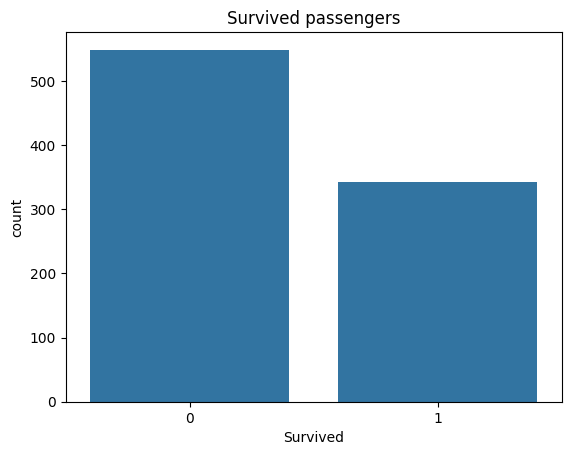

In [ ]:
sns.countplot(x = 'Survived', data = titanic_df).set_title('Survived passengers')
plt.show()

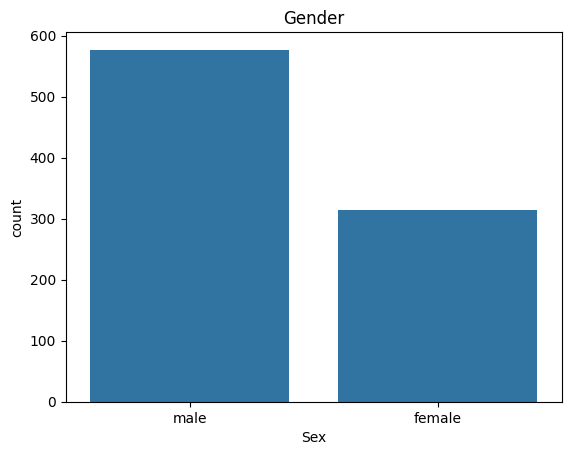

In [ ]:
sns.countplot(x = 'Sex', data = titanic_df).set_title('Gender')
plt.show()

Text(0.5, 1.0, 'Passengers who have survived the collision')

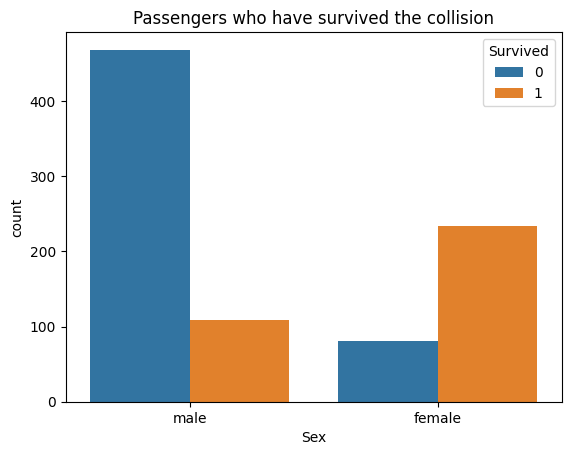

In [ ]:
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_df).set_title('Passengers who have survived the collision')

Text(0.5, 1.0, 'Number of Passengers in different class.')

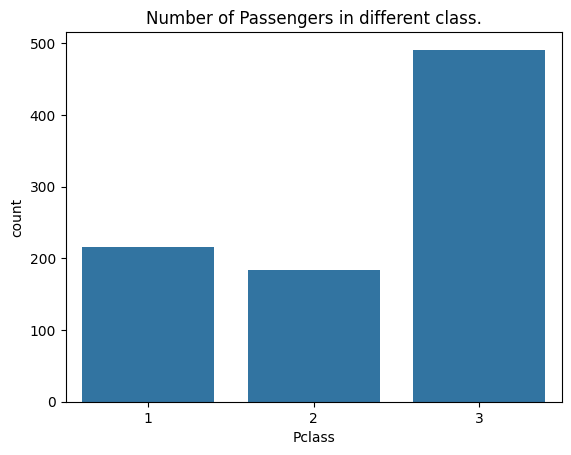

In [ ]:
sns.countplot(x = 'Pclass', data = titanic_df).set_title('Number of Passengers in different class.')

Text(0.5, 1.0, 'Number of Passengers in different class of both Male and Female')

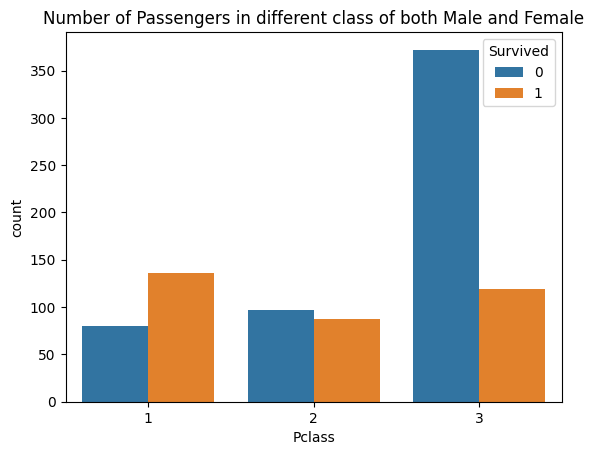

In [ ]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_df).set_title('Number of Passengers in different class of both Male and Female')

In [ ]:
titanic_df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [ ]:
titanic_df.replace({'Sex':{'male':1,'female':2}, 'Embarked':{'S':1,'C':2,'Q':3}}, inplace = True)

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1


In [ ]:
X = titanic_df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
Y = titanic_df['Survived']
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         1
1         1    2  38.000000      1      0  71.2833         2
2         3    2  26.000000      0      0   7.9250         1
3         1    2  35.000000      1      0  53.1000         1
4         3    1  35.000000      0      0   8.0500         1
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         1
887       1    2  19.000000      0      0  30.0000         1
888       3    2  29.699118      1      2  23.4500         1
889       1    1  26.000000      0      0  30.0000         2
890       3    1  32.000000      0      0   7.7500         3

[891 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [ ]:
titanic_test = pd.get_dummies(X, columns=['Sex'], drop_first=True)

#Model Training
#Using Logistic Regression

model = LogisticRegression(random_state = 0)

#Training model
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
#Evaluation of the Model
#Accuracy Score
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data = ', training_data_accuracy)

Accuracy score of training data =  0.8089887640449438


In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data = ', test_data_accuracy)

Accuracy score of test data =  0.7821229050279329
